In [139]:
from matplotlib import pyplot as plt
from scipy import stats
import numpy as np
import pandas as pd
from collections import Counter             # Used to tally the languages

In [140]:
# Two versions of the file - Edited is a slimed down version and full is the unedited version
file = ("Resources/survey_results_2021_edited.csv")          # Slimed down
df = pd.read_csv(file)                                     # Read into df  pandas dataframe
df.head(1)


,ResponseId,MainBranch,Country,US_State,UK_Country,LanguageHaveWorkedWith,LanguageWantToWorkWith,DatabaseHaveWorkedWith,DatabaseWantToWorkWith,Age,Gender,Sexuality,Ethnicity
0,1,I am a developer by profession,Slovakia,NaN,NaN,C++;HTML/CSS;JavaScript;Objective-C;PHP;Swift,Swift,PostgreSQL;SQLite,SQLite,25-34 years old,Man,Straight / Heterosexual,White or of European descent


In [141]:
# Second file that we could use - has all data with no columns removed
full_file = ("Resources/survey_results_public.csv")           # Unedited file
full_df = pd.read_csv(full_file)                              # Read into full_df pandas dataframe
full_df.head(1)

,ResponseId,MainBranch,Employment,Country,US_State,UK_Country,EdLevel,Age1stCode,LearnCode,YearsCode,...,Age,Gender,Trans,Sexuality,Ethnicity,Accessibility,MentalHealth,SurveyLength,SurveyEase,ConvertedCompYearly
0,1,I am a developer by profession,"Independent contractor, freelancer, or self-em...",Slovakia,NaN,NaN,"Secondary school (e.g. American high school, G...",18 - 24 years,Coding Bootcamp;Other online resources (ex: vi...,NaN,...,25-34 years old,Man,No,Straight / Heterosexual,White or of European descent,None of the above,None of the above,Appropriate in length,Easy,62268.0


In [142]:
# Dropping columns from df that will not be used.  Might keep this? - Deleted Drop


 # Working to split language up so we can count how many people use which lanaguge 
df.dropna(axis='index', how='all', subset=['LanguageHaveWorkedWith'])
df.rename(columns={ 'MainBranch': 'Main Branch', 'LanguageHaveWorkedWith': 'Languages Learned', 'LanguageWantToWorkWith': 'Future Goal Language'}, inplace=True)

In [143]:
# This fills in missing data from the data frame with "Not Applicable"
df.replace(np.nan, "Not Applicable").head(5)
full_df.replace(np.nan, "Not Applicable").head(5)
# df.fillna('Not Applicable')



,ResponseId,MainBranch,Employment,Country,US_State,UK_Country,EdLevel,Age1stCode,LearnCode,YearsCode,...,Age,Gender,Trans,Sexuality,Ethnicity,Accessibility,MentalHealth,SurveyLength,SurveyEase,ConvertedCompYearly
0,1,I am a developer by profession,"Independent contractor, freelancer, or self-em...",Slovakia,Not Applicable,Not Applicable,"Secondary school (e.g. American high school, G...",18 - 24 years,Coding Bootcamp;Other online resources (ex: vi...,Not Applicable,...,25-34 years old,Man,No,Straight / Heterosexual,White or of European descent,None of the above,None of the above,Appropriate in length,Easy,62268
1,2,I am a student who is learning to code,"Student, full-time",Netherlands,Not Applicable,Not Applicable,"Bachelor’s degree (B.A., B.S., B.Eng., etc.)",11 - 17 years,"Other online resources (ex: videos, blogs, etc...",7,...,18-24 years old,Man,No,Straight / Heterosexual,White or of European descent,None of the above,None of the above,Appropriate in length,Easy,Not Applicable
2,3,"I am not primarily a developer, but I write co...","Student, full-time",Russian Federation,Not Applicable,Not Applicable,"Bachelor’s degree (B.A., B.S., B.Eng., etc.)",11 - 17 years,"Other online resources (ex: videos, blogs, etc...",Not Applicable,...,18-24 years old,Man,No,Prefer not to say,Prefer not to say,None of the above,None of the above,Appropriate in length,Easy,Not Applicable
3,4,I am a developer by profession,Employed full-time,Austria,Not Applicable,Not Applicable,"Master’s degree (M.A., M.S., M.Eng., MBA, etc.)",11 - 17 years,Not Applicable,Not Applicable,...,35-44 years old,Man,No,Straight / Heterosexual,White or of European descent,I am deaf / hard of hearing,Not Applicable,Appropriate in length,Neither easy nor difficult,Not Applicable
4,5,I am a developer by profession,"Independent contractor, freelancer, or self-em...",United Kingdom of Great Britain and Northern I...,Not Applicable,England,"Master’s degree (M.A., M.S., M.Eng., MBA, etc.)",5 - 10 years,Friend or family member,17,...,25-34 years old,Man,No,Not Applicable,White or of European descent,None of the above,Not Applicable,Appropriate in length,Easy,Not Applicable


In [144]:
# gender_groupby = clean_df.groupby(["Gender"])
# gender_groupby.sum()
#clean_df["Gender"].value_counts()
# men = clean_df.loc[clean_df["Gender"]=="Man"]
# women = clean_df.loc[clean_df["Gender"]=="Woman"]
# non_binary = clean_df.loc[clean_df["Gender"]=="Non-Binary"]


In [145]:
#TODO: Clean up or combine loops

# Pull series LanguageHaveWorkedWith and find the top 20 popular languages
# Isolate Column - split langs into a list - count number of repeats?
   
# Method to pull top languages.  Can be used on current and what people want to learn.
def find_top_langs(df_in):   
    cnt = Counter()                                     # Create a counter object
    temp_list = []                                      # PLace holder list to hold a list of lists
    flat_list = []                                      # "flat" list that makes a 2d list a 1d.  Gets rid of nested list

    # This for loop creates a list from each row in the series and then from that a list to break up the different langs
    # Example String ->  ['C++;Python;PHP'] -> Split ['C++', 'Python', 'PHP'] - For each Row
    for langs in df_in:
        langs = str(langs)
        temp_list.append(langs.split(';'))

    # This opens up the the list of lists and makes it into one gaint list
    for temp in temp_list:              # temp is a list inside a list [[list1], [list2], [list3]]
        for flat in temp:               # flat is the element in list1, list2, list3
            flat_list.append(flat)      # New List with no lists - just elements [list1, list2, list3]

    for temp in flat_list:              # Counts and tallys how many times it is each element
        cnt[temp] += 1

    # cnt                                 # Outputs the data as a dictionary

    cnt_df = pd.DataFrame(cnt.items()).sort_values(by=[1], ascending=False)     # Convert to a dataframe to sort
    return cnt_df


In [146]:
# Run the method based off of languages Learned column

top10current = find_top_langs(full_df['LanguageHaveWorkedWith'] ).set_index(0).reset_index().head(10)  
top10current                                

,0,1
0,JavaScript,53587
1,HTML/CSS,46259
2,Python,39792
3,SQL,38835
4,Java,29162
5,Node.js,27975
6,TypeScript,24909
7,C#,22984
8,Bash/Shell,22385
9,C++,20057


In [147]:
# Run the method based off of languages Learned column
top10future = find_top_langs(full_df['LanguageWantToWorkWith'] ).set_index(0).reset_index().head(10)         
top10future                   

,0,1
0,JavaScript,37008
1,Python,34929
2,HTML/CSS,29353
3,TypeScript,26905
4,SQL,26631
5,Node.js,24100
6,C#,17999
7,Java,17222
8,Rust,15865
9,Go,15788


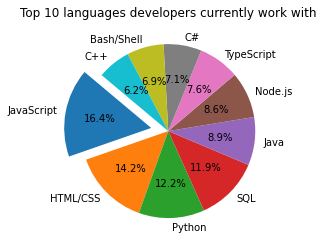

In [148]:
# Labels for the sections of our pie chart
labels = top10current[0]
sizes = top10current[1]
explode = (0.2, 0,0,0,0,0,0,0,0,0)
plt.pie(sizes, explode=explode, labels=labels, autopct="%1.1f%%", startangle=140)
plt.title('Top 10 languages developers currently work with')
plt.show()


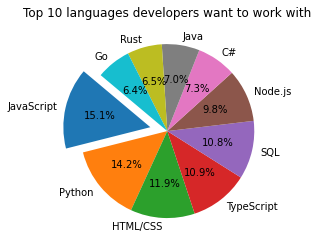

In [149]:
# Labels for the sections of our pie chart
labels = top10future[0]
sizes = top10future[1]
explode = (0.2, 0,0,0,0,0,0,0,0,0)
plt.pie(sizes,  explode=explode, labels=labels, autopct="%1.1f%%", startangle=140)
plt.title('Top 10 languages developers want to work with')
plt.show()


In [150]:
# pull main data frame and isolate only people that have javascript in full_df['LanguageHaveWorkedWith']
# Code goes through the LanguageHaveWorkedWith series and looks for the string JavaScript within the series.  Once it finds
# all instances it creates a new data frame with just those rows.  The Row count is equal to the count we did in the 
# beginning '53587'.  This way we can check that it is the correct amount.
find_js_df = full_df.loc[full_df['LanguageHaveWorkedWith'].str.contains('JavaScript',  case = False, na=False)]
find_js_df['LanguageHaveWorkedWith']

0            C++;HTML/CSS;JavaScript;Objective-C;PHP;Swift
1                                        JavaScript;Python
3                                    JavaScript;TypeScript
5        C;C#;C++;HTML/CSS;Java;JavaScript;Node.js;Powe...
6                                      HTML/CSS;JavaScript
                               ...                        
83426       Bash/Shell;HTML/CSS;Java;JavaScript;Python;SQL
83431    C#;Dart;HTML/CSS;Java;JavaScript;Kotlin;Node.j...
83433        Java;JavaScript;Kotlin;Objective-C;TypeScript
83437                 Bash/Shell;JavaScript;Node.js;Python
83438               Delphi;Elixir;HTML/CSS;Java;JavaScript
Name: LanguageHaveWorkedWith, Length: 53587, dtype: object

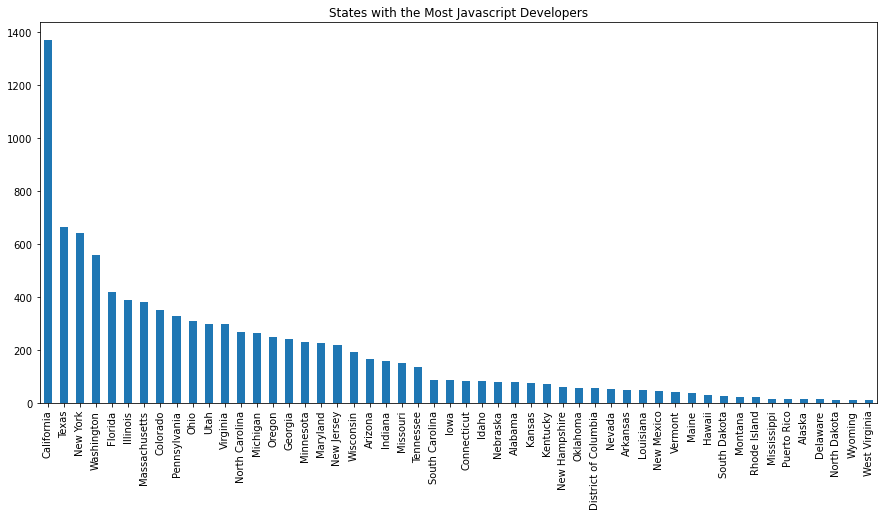

In [151]:
# Trying to count people using javascript in each indivual state.


js_states = find_js_df.set_index('US_State')
js_states = js_states.drop(['I do not reside in the United States','Guam'])
js_states = js_states.reset_index()
js_states['US_State'].value_counts().sort_values(ascending=False).plot(kind = 'bar', rot=90,
                                                           figsize=(15,7),
                                                           title='States with the Most Javascript Developers') 
                                                        #    xlabel='States') 
                                                        #    ylabel='Developers')



In [152]:
#this is where I will work on cleaning up the gender column to just include Man, Woman, Non-binary, genderqueer, or gender non-conforming
# find_js_df.replace(to_replace =["Man;Woman;Or, in your own words:", 
#                                 "Woman;Non-binary, genderqueer, or gender non-conforming;Or, in your own words:",
#                                 "Man;Non-binary, genderqueer, or gender non-conforming;Or, in your own words:", 
#                                 "Man;Woman;Non-binary, genderqueer, or gender non-conforming;Or, in your own words:",
#                                 "Man;Woman"
# ],
#                  value ="Non-binary, genderqueer, or gender non-conforming")
find_js_df['Gender'].value_counts()


Man                                                                                   48505
Woman                                                                                  2485
Prefer not to say                                                                       809
Non-binary, genderqueer, or gender non-conforming                                       424
Or, in your own words:                                                                  252
Man;Or, in your own words:                                                              184
Man;Non-binary, genderqueer, or gender non-conforming                                   159
Woman;Non-binary, genderqueer, or gender non-conforming                                  96
Man;Woman                                                                                19
Non-binary, genderqueer, or gender non-conforming;Or, in your own words:                 15
Man;Woman;Non-binary, genderqueer, or gender non-conforming                     

In [153]:
# find_js_df['Gender'].replace(regex=
#                         #['Man;Woman;Or, in your own words:'],
#                         #['Woman;Non-binary, genderqueer, or gender non-conforming;Or, in your own words:'],
#                         #['Man;Non-binary, genderqueer, or gender non-conforming;Or, in your own words:'],
#                          #['Man;Woman;Non-binary, genderqueer, or gender non-conforming;Or, in your own words:'],
#                         #['Non-binary, genderqueer, or gender non-conforming;Or, in your own words:'],
#                         #['Man;Woman'],
#                         #['Non-binary, genderqueer, or gender non-conforming;Non-binary, genderqueer, or gender non-conforming'],
#                         #['Or, in your own words:'],
#                  value ="Non-binary, genderqueer, or gender non-conforming")
# find_js_df['Gender'].replace(regex=['Man;Non-binary, genderqueer, or gender non-conforming'], value = ['Man'], inplace=True)
# find_js_df['Gender'].replace(regex=['Woman;Non-binary, genderqueer, or gender non-conforming'], value = ['Woman'], inplace=True)

In [154]:
find_js_df['Gender'].value_counts()

Man                                                                                   48505
Woman                                                                                  2485
Prefer not to say                                                                       809
Non-binary, genderqueer, or gender non-conforming                                       424
Or, in your own words:                                                                  252
Man;Or, in your own words:                                                              184
Man;Non-binary, genderqueer, or gender non-conforming                                   159
Woman;Non-binary, genderqueer, or gender non-conforming                                  96
Man;Woman                                                                                19
Non-binary, genderqueer, or gender non-conforming;Or, in your own words:                 15
Man;Woman;Non-binary, genderqueer, or gender non-conforming                     

Text(0, 0.5, 'Number of Users')

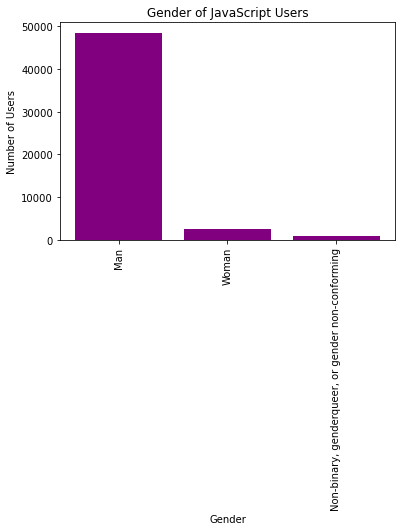

In [155]:
users = find_js_df['Gender'].value_counts().head(3)
x_axis = ['Man', 'Woman', 'Non-binary, genderqueer, or gender non-conforming']
plt.bar(x_axis, users, color='purple')
plt.xticks(rotation=90)
plt.title("Gender of JavaScript Users")
plt.xlabel("Gender")
plt.ylabel("Number of Users")


In [156]:
unique_countries_df = find_js_df["Country"].unique()
unique_countries_df

array(['Slovakia', 'Netherlands', 'Austria', 'United States of America',
       'Malaysia', 'India', 'Spain', 'Peru',
       'United Kingdom of Great Britain and Northern Ireland', 'Turkey',
       'Canada', 'Brazil', 'Sweden', 'France', 'Germany', 'Malawi',
       'Poland', 'Viet Nam', 'Italy', 'Greece', 'Russian Federation',
       'Ireland', 'Georgia', 'Uzbekistan', 'Switzerland', 'Hungary',
       'Belgium', 'Israel', 'Nigeria', 'Albania', 'Bangladesh', 'Romania',
       'Lithuania', 'Ukraine', 'Croatia', 'Denmark', 'Bahrain', 'Egypt',
       'Nepal', 'Colombia', 'Indonesia', 'Czech Republic', 'Chile',
       'Serbia', 'Iran, Islamic Republic of...', 'New Zealand',
       'Bulgaria', 'Estonia', 'Tunisia', 'Armenia', 'Finland',
       'Hong Kong (S.A.R.)', 'Argentina', 'Costa Rica', 'South Africa',
       'Japan', 'United Arab Emirates', 'Bolivia', 'Portugal',
       'Bosnia and Herzegovina', 'Pakistan', 'Uruguay', 'Lebanon',
       'South Korea', 'China', 'Luxembourg', 'Malta', 'Be

In [157]:

number_unique_countries = full_df['Country'].nunique()
number_unique_countries

181

In [158]:

js_country = find_js_df['Country'].value_counts()

js_country.head()


United States of America                                9987
India                                                   6460
Germany                                                 3389
United Kingdom of Great Britain and Northern Ireland    2850
Canada                                                  1981
Name: Country, dtype: int64

In [159]:

clean_df = df[['Country','Languages Learned']]
#clean_df
gb_df = clean_df.groupby(['Country'])
gb_df.count()
country_count = clean_df['Country'].value_counts()
country_count.head()
country_language_javascript_df = gb_df['Languages Learned'].apply(lambda x: x.str.contains('JavaScript').sum())
country_language_javascript_df
javascript_df = pd.concat([country_count,country_language_javascript_df], axis='columns', sort=False) 
javascript_df
javascript_df.rename(columns={'Country': 'Number of Respondants', 'Languages Learned': 'NumKnowsJavaS'}, inplace = True)
javascript_df['PercentJavaS'] = (javascript_df['NumKnowsJavaS']/javascript_df['Number of Respondants'])*100
javascript_df['PercentJavaS'] = javascript_df['PercentJavaS'].map("{:,.2f}%".format)

javascript_df.head(10)

,Number of Respondants,NumKnowsJavaS,PercentJavaS
United States of America,15288,9987,65.33%
India,10511,6460,61.46%
Germany,5625,3389,60.25%
United Kingdom of Great Britain and Northern Ireland,4475,2850,63.69%
Canada,3012,1981,65.77%
France,2708,1802,66.54%
Brazil,2254,1533,68.01%
Poland,1805,1081,59.89%
Netherlands,1772,1183,66.76%
Italy,1666,1096,65.79%


In [160]:
country_language_HTMLCSS_df = gb_df['Languages Learned'].apply(lambda x: x.str.contains('HTML/CSS').sum())
#country_language_HTMLCSS_df
HTMLCSS_df = pd.concat([country_count,country_language_HTMLCSS_df], axis='columns', sort=False) 
#HTMLCSS_df
HTMLCSS_df.rename(columns={'Country': 'Number of Respondants', 'Languages Learned': 'NumKnowsHTML/CSS'}, inplace = True)
HTMLCSS_df['PercentHTML/CSS'] = (HTMLCSS_df['NumKnowsHTML/CSS']/HTMLCSS_df['Number of Respondants'])*100

HTMLCSS_df['PercentHTML/CSS'] = HTMLCSS_df['PercentHTML/CSS'].map("{:,.2f}%".format)
HTMLCSS_df.head(10)

,Number of Respondants,NumKnowsHTML/CSS,PercentHTML/CSS
United States of America,15288,8492,55.55%
India,10511,5844,55.60%
Germany,5625,3030,53.87%
United Kingdom of Great Britain and Northern Ireland,4475,2450,54.75%
Canada,3012,1690,56.11%
France,2708,1592,58.79%
Brazil,2254,1220,54.13%
Poland,1805,904,50.08%
Netherlands,1772,1020,57.56%
Italy,1666,961,57.68%


In [161]:
country_language_python_df = gb_df['Languages Learned'].apply(lambda x: x.str.contains('Python').sum())
#country_language_python_df
python_df = pd.concat([country_count,country_language_python_df], axis='columns', sort=False) 
#python_df
python_df.rename(columns={'Country': 'Number of Respondants', 'Languages Learned': 'NumKnowsPython'}, inplace = True)
python_df['PercentPython'] = (python_df['NumKnowsPython']/python_df['Number of Respondants'])*100

python_df['PercentPython'] = python_df['PercentPython'].map("{:,.2f}%".format)
python_df.head(10)

,Number of Respondants,NumKnowsPython,PercentPython
United States of America,15288,7975,52.17%
India,10511,5233,49.79%
Germany,5625,2713,48.23%
United Kingdom of Great Britain and Northern Ireland,4475,2149,48.02%
Canada,3012,1593,52.89%
France,2708,1423,52.55%
Brazil,2254,951,42.19%
Poland,1805,812,44.99%
Netherlands,1772,831,46.90%
Italy,1666,735,44.12%


In [168]:
dropped_JS = javascript_df.drop(['Number of Respondants','NumKnowsJavaS'], axis = 1)
dropped_HTMLCSS = HTMLCSS_df.drop(['Number of Respondants','NumKnowsHTML/CSS'], axis = 1)
dropped_python = python_df.drop(['Number of Respondants','NumKnowsPython'], axis = 1)
country_lang_merge_df = pd.concat([dropped_JS, dropped_HTMLCSS,dropped_python],axis='columns', sort=False)
country_lang_merge_df.head(15)

,PercentJavaS,PercentHTML/CSS,PercentPython
United States of America,65.33%,55.55%,52.17%
India,61.46%,55.60%,49.79%
Germany,60.25%,53.87%,48.23%
United Kingdom of Great Britain and Northern Ireland,63.69%,54.75%,48.02%
Canada,65.77%,56.11%,52.89%
France,66.54%,58.79%,52.55%
Brazil,68.01%,54.13%,42.19%
Poland,59.89%,50.08%,44.99%
Netherlands,66.76%,57.56%,46.90%
Italy,65.79%,57.68%,44.12%


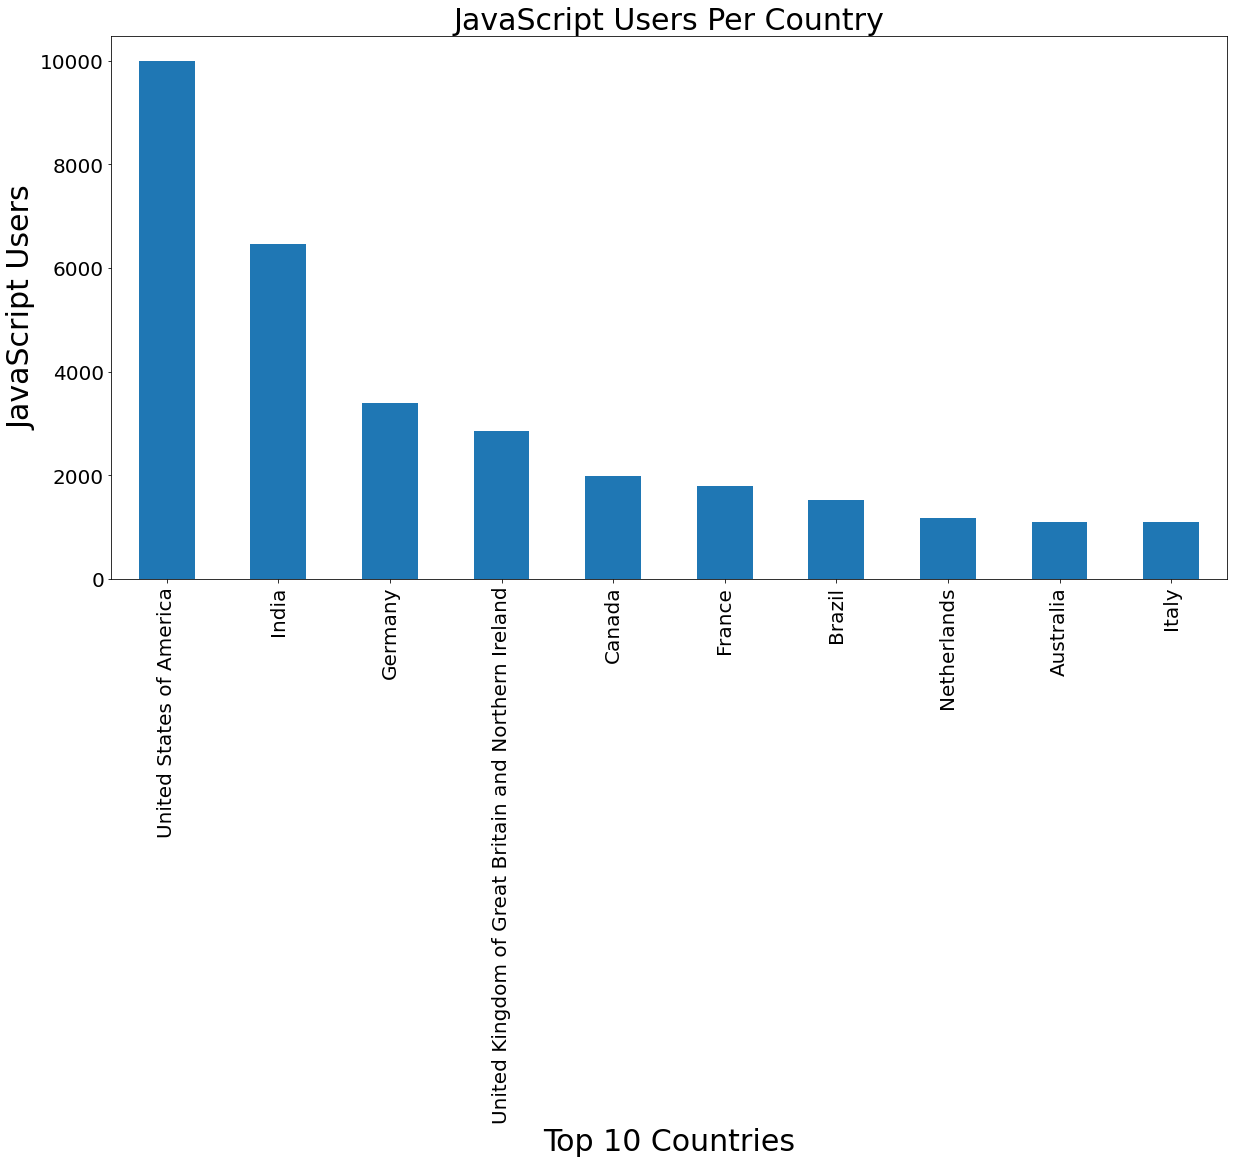

In [163]:
js_country.head(10).plot(kind="bar", figsize=(20,10))



plt.title("JavaScript Users Per Country", fontsize = 30)
plt.xlabel('Top 10 Countries',fontsize = 30)
plt.ylabel('JavaScript Users', fontsize = 30)
plt.xticks(fontsize=20)
plt.yticks(fontsize=20)


plt.show()


C:\Users\georg\anaconda4\envs\PythonData\lib\site-packages\ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """
C:\Users\georg\anaconda4\envs\PythonData\lib\site-packages\ipykernel_launcher.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


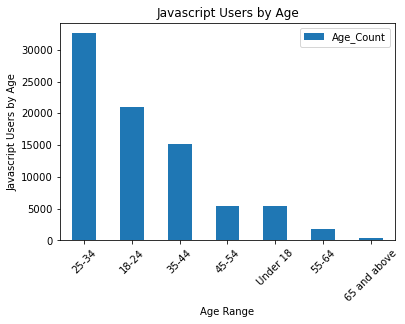

In [164]:
#drop 'prefer not to say'
find_js_df = full_df[full_df["Age"].str.contains('Prefer not to say') == False]

#drop 'years old and years or older'
find_js_df["Age"]=find_js_df['Age'].apply(lambda x: str(x).replace(" years old", ""))
find_js_df["Age"]=find_js_df['Age'].apply(lambda x: str(x).replace(" years or older", " and above"))

#count indv age group
age_count = find_js_df['Age'].value_counts()
age_count

# converting to df and assigning new names to the columns
df_value_counts = pd.DataFrame(age_count)
df_value_counts = df_value_counts.reset_index()
df_value_counts.columns = ['Age_Range', 'Age_Count'] # change column names
#df_value_counts.set_index('Age_Range', inplace=True) #
df_value_counts = df_value_counts.set_index('Age_Range')
df_value_counts

df_value_counts.plot(kind='bar')

plt.xticks(rotation=45)
plt.title("Javascript Users by Age")
plt.xlabel("Age Range" )
plt.ylabel("Javascript Users by Age")
plt.show()